# Porto Seguro Safe Driver Prediction
- Porto Seguro는 브라질의 자동차 보험 회사입니다. 본 경진 대회의 목적은 어떤 차주가 내년에 보험 청구를 할 확률을 예측하는 겁니다.
- 데이터는 59만 개의 훈련 데이터와 89만 개의 테스트 데이터로 구성됐다.
- Null 값이 np.NaN이 아닌 -1로 되어있다.
- Feature가 무엇을 뜻하는지 제시하지 않았다는 것이 특징이고, 단지 Feature가 binary인지, categorical인지, oridnal인지, nominal인지만 구분할 수 있다. 보안상 공개 x
```
ind:정수값 매핑
reg:region(지역관련 변수로 예상)
car:차에 관련된 변수
calc:실수값(어떤 값들이 임의로 계산된 값이라고 예상)
```
- target은 보험 청구를 한다(=1), 보험 청구를 하지 않는다(=0)인 binary 데이터입니다. 0과 1로 구성되어 있으며 0이 1보다 압도적으로 많다.

## Loading packages

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', 100)

## Loading data

In [26]:
import os
filepath = os.getenv('HOME')+'/aiffel/Kaggle/Porto_Seguro’s_Safe_Driver_Prediction/' 
train=pd.read_csv('./train.csv')
test=pd.read_csv('./test.csv')

## Data at first sight
- 유사한 피처들은 같은 태그를 가지고 있다.(예: ind, reg, car, calc)
- 피처 이름 뒤에 bin은 binary 피처를 의미하고, cat은 category 피처를 의미한다.
- 피처 이름에 아무런 접미사가 없는 것은 연속되는 수이거나 서수이다.
- 값이 -1이면 관찰에서 누락된 것을 의미한다.
- 타겟 컬럼은 해당 보험 계약자에 대한 청구가 제기되었는지의 여부이다.

In [27]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [28]:
train.tail()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
595207,1488013,0,3,1,10,0,0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.5,0.3,0.692820,10,1,-1,0,1,1,1,1,0,1,31,3,0.374166,0.684631,0.385487,2.645751,0.4,0.5,0.3,3,0,9,0,9,1,12,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,0.7,1.382027,9,1,-1,0,-1,15,0,0,2,1,63,2,0.387298,0.972145,-1.000000,3.605551,0.2,0.2,0.0,2,4,8,6,8,2,12,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,0.2,0.659071,7,1,-1,0,-1,1,1,1,2,1,31,3,0.397492,0.596373,0.398748,1.732051,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.9,0.4,0.698212,11,1,-1,0,-1,11,1,1,2,1,101,3,0.374166,0.764434,0.384968,3.162278,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2,0,1,1,1,0,0
595211,1488027,0,0,1,8,0,0,1,0,0,0,0,0,0,0,0,7,1,0,0,0.1,0.2,-1.000000,7,0,-1,0,-1,0,1,0,2,1,34,2,0.400000,0.932649,0.378021,3.741657,0.4,0.0,0.5,2,3,10,4,10,2,5,4,4,3,8,0,1,0,0,0,0


- binary variables
- categorical variables of which the category values are integers
- other variables with integer or float values
- variables with -1 representing missing values
- the target variable and an ID variable

In [29]:
train.shape #59개의 변수/595.212 행

(595212, 59)

In [30]:
train.drop_duplicates()
train.shape  #중복된 거 존재 x

(595212, 59)

In [31]:
test.shape  #target column 이므로 1개의 열이 부족하다.

(892816, 58)

In [32]:
train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

with the info() method we see that the data type is integer or float. No null values are present in the data set. That's normal because missing values are replaced by -1.

## Metadata
데이터 관리를 쉽게 하기 위해 변수에 대한 메타 정보를 데이터프레임에 저장합니다.
이렇게 하면 분석, 시각화, 모델링을 위해 특정 변수를 선택하고자 할 때 도움이 될 것입니다. 각 feature들의 특징을 담은 Meta Data를 만들어 필요할 때마다 사용하는 것이다. 어떤 조건의 feature만 사용하고 싶을 때 그때마다 코드를 작성하기 번거롭다. 편리성을 위해 Meta Data를 미리 만들어 놓고 간단한 코드로 원하는 feature를 가져올 수 있다. 

- role : input,ID,target
- level : nominal, interval, ordinal, binary -> feature들의 type에 따라 level 정함
- keep : True or False -> 데이터를 활용할 것이냐 아니냐에 따라 정함
- dtype : int,float,str

In [33]:
data=[]
for f in train.columns:
    #Defining the role
    if f == 'target':
        role = 'target'
    elif f == 'id':
        role = 'id'
    else:
        role = 'input'
        
    # Defining the level
    if 'bin' in f or f=='target':
        level = 'binary'
    elif 'cat' in f or f == 'id':
        level = 'nominal'
    elif train[f].dtype == float:
        level = 'interval'
    elif train[f].dtype == int:
        level = 'ordinal'
        
    #Initialize keep to True for all variables except for id
    keep = True
    if f == 'id':
        keep = False
        
    #Defining the data type
    dtype = train[f].dtype
    
    #Creating a Dict that contains all the metadata for the variable
    f_dict = {
        'varname' : f,
        'role' : role,
        'level' : level,
        'keep' : keep,
        'dtype' : dtype
    }
    data.append(f_dict)
    
meta = pd.DataFrame(data, columns=['varname','role','level','keep','dtype'])
meta.set_index('varname',inplace=True)

In [34]:
meta

,role,level,keep,dtype
varname,,,,
id,id,nominal,False,int64
target,target,binary,True,int64
ps_ind_01,input,ordinal,True,int64
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,ordinal,True,int64
ps_ind_04_cat,input,nominal,True,int64
ps_ind_05_cat,input,nominal,True,int64
ps_ind_06_bin,input,binary,True,int64
ps_ind_07_bin,input,binary,True,int64


In [35]:
meta[(meta.level == 'nominal') & (meta.keep)].index
#드롭되지 않은 모든 nominal 변수 추출

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object', name='varname')

Example to extract all nominal variables that are not dropped

In [36]:
pd.DataFrame({'count':meta.groupby(['role','level'])['role'].size()}).reset_index()

,role,level,count
0,id,nominal,1
1,input,binary,17
2,input,interval,10
3,input,nominal,14
4,input,ordinal,16
5,target,binary,1


In [37]:
meta.groupby(['role','level'])['role'].size()

role    level   
id      nominal      1
input   binary      17
        interval    10
        nominal     14
        ordinal     16
target  binary       1
Name: role, dtype: int64

- reset_index() 함수
1. 데이터프레임의 다양한 전처리 과정을 거치게 되면 인덱스가 뒤죽박죽인 경우가 많다. 이럴때 인덱스를 다시 처음부터 재배열 해주는 유용한 함수이다.
2. 컬럼명 role로 지정한 인덱스가 삭제되고 행 번호 인덱스로 생성

In [38]:
pd.DataFrame({'count':meta.groupby(['role','level'])['role'].size()})

count
role   level          
id     nominal       1
input  binary       17
       interval     10
       nominal      14
       ordinal      16
target binary        1

## Descriptive statistics 기술통계
- 데이터 프레임에 describe 메소드를 적용 할 수도 있습니다.
- 그러나 범주형 변수와 id 변수에서 평균, 표준 등을 계산하는 것은별로 의미가 없습니다.
- 범주형 변수는 나중에 시각적으로 살펴볼 것입니다.
- 메타 파일 덕분에 기술 통계를 계산할 변수를 쉽게 선택할 수 있습니다. 일을 분명히하기 위해 우리는 데이터 유형마다 이것을 할 것입니다.

### Interval 변수

In [39]:
v=meta[(meta.level == 'interval') & (meta.keep)].index
train[v].describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.551102,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849
std,0.287643,0.404264,0.793506,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153
min,0.000000,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.720677,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


1. reg 변수
- ps_reg_03 변수만 결측값 존재
- 변수들 마다 범위(최소-최대)는 다릅니다. 스케일링을 할 수 있지만 우리가 사용하려는 분류기마다 다를 것 입니다.

2. car 변수
- ps_car_12 와 ps_car_14는 결측값 존재
- 변수들 마다 범위가 다르고 스케일링 할 수 있다.

3. calc 변수
- 누락값이 없다.
- 최대가 0.9인 어떤 비율일 것이다.
- 3개의 calc 변수는 모두 유사한 분포를 가지고 있다.

### Ordinal 변수

In [40]:
v=meta[(meta.level=='ordinal') & (meta.keep)].index
train[v].describe()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_car_11,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,1.900378,4.423318,0.012451,7.299922,2.346072,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026
std,1.983789,2.699902,0.127545,3.546042,0.832548,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,2.000000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,1.000000,4.000000,0.000000,7.000000,3.000000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,3.000000,6.000000,0.000000,10.000000,3.000000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,7.000000,11.000000,4.000000,13.000000,3.000000,5.000000,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,19.000000,10.000000,13.000000,23.000000


- ps_car_11 만 유일하게 결측값 존재
- 다양한 범위를 다루기 위해 스케일링을 적용할 수 있다.

### Binary 변수

In [41]:
v = meta[(meta.level == 'binary') & (meta.keep)].index
train[v].describe()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.660823,0.121081,0.153446,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.473430,0.326222,0.360417,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- train 데이터는 1% 가 target=1이고 나머지는 target=0->(but,필사에서는 3.645%)
- 평균을 통해 우리는 대부분의 경우 값이 0이라고 말할 수 있습니다.

### Handling imbalanced classes
1. target = 1 인 레코드의 비율은 target = 0보다 훨씬 적습니다.
2. 이것은 정확도가 높지만 실제로 부가 가치가있는 모델인지는 모릅니다. 이 문제를 해결할 수있는 두 가지 전략은 다음과 같습니다.
- target=1 레코드를 오버샘플링 -> target=0 인 샘플을 늘린다.
- target=0 레코드를 언더샘플링 -> target=1 인 샘플을 줄인다.
3. 큰 훈련 세트가 있으므로 언더 샘플링을 할 수 있습니다.

In [42]:
desired_apriori=0.10

# Get the indices per target value
idx_0 = train[train.target == 0].index
idx_1 = train[train.target == 1].index

# Get original number of records per target value
nb_0 = len(train.loc[idx_0])
nb_1 = len(train.loc[idx_1])

# Calculate the undersampling rate and resulting number of records with target=0
undersampling_rate = ((1-desired_apriori)*nb_1)/(nb_0*desired_apriori)
undersampled_nb_0 = int(undersampling_rate*nb_0)
print('Rate to undersample records with target=0 : {}'.format(undersampling_rate))
print('Number of records with target=0 after undersampling:{}'.format(undersampled_nb_0))

# Randomly select records with target=0 to get at the desired a priori
undersampled_idx = shuffle(idx_0, random_state=37, n_samples=undersampled_nb_0)

# Construct list with remaining indices
idx_list = list(undersampled_idx) + list(idx_1)

# Return undersample data frame
train = train.loc[idx_list].reset_index(drop=True)


Rate to undersample records with target=0 : 0.34043569687437886
Number of records with target=0 after undersampling:195246


## Data Quality Checks
### Checking missing values

In [43]:
vars_with_missing = []

for f in train.columns:
    missings = train[train[f] == -1][f].count()
    if missings > 0:
        vars_with_missing.append(f)
        missings_perc = missings/train.shape[0]
        
        print('Variable {} has {} records ({:.2%}) with missing values'.format(f,missings,missings_perc))
        
        print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))

Variable ps_ind_02_cat has 103 records (0.05%) with missing values
In total, there are 1 variables with missing values
Variable ps_ind_04_cat has 51 records (0.02%) with missing values
In total, there are 2 variables with missing values
Variable ps_ind_05_cat has 2256 records (1.04%) with missing values
In total, there are 3 variables with missing values
Variable ps_reg_03 has 38580 records (17.78%) with missing values
In total, there are 4 variables with missing values
Variable ps_car_01_cat has 62 records (0.03%) with missing values
In total, there are 5 variables with missing values
Variable ps_car_02_cat has 2 records (0.00%) with missing values
In total, there are 6 variables with missing values
Variable ps_car_03_cat has 148367 records (68.39%) with missing values
In total, there are 7 variables with missing values
Variable ps_car_05_cat has 96026 records (44.26%) with missing values
In total, there are 8 variables with missing values
Variable ps_car_07_cat has 4431 records (2.04

In [45]:
vars_with_missing = []

for f in train.columns:
    missings = train[train[f] == -1][f].count()
    if missings > 0:
        vars_with_missing.append(f)
        missings_perc = missings/train.shape[0]
        print(f,format(missings_perc,'.2%'))
        

ps_ind_02_cat 0.05%
ps_ind_04_cat 0.02%
ps_ind_05_cat 1.04%
ps_reg_03 17.78%
ps_car_01_cat 0.03%
ps_car_02_cat 0.00%
ps_car_03_cat 68.39%
ps_car_05_cat 44.26%
ps_car_07_cat 2.04%
ps_car_09_cat 0.11%
ps_car_11 0.00%
ps_car_14 7.25%


In [46]:
(train['ps_car_11']==-1).sum()

1

- ps_car_03_cat,ps_car_05_cat : 결측값의 비율이 높으므로 제거한다
- 결측값이 있는 다른 범주형 변수의 경우 결측값 -1을 그대로 둘 수 있다.
- ps_reg_03 (continuous) : 모든 레코드의 18%에 대해 결측값이 있다. 평균값으로 바꾼다.
- ps_car_11 (ordinal) : 결측치인 레코드가 1 개뿐입니다. 평균값으로 교체한다.
- ps_car_12 (continuous) : ?????
- ps_car_14 (continuous) : 모든 레코드의 7 %에 대해 결측치가 있다. 평균값으로 바꾼다.

In [21]:
## ?????오류
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# Dropping the variables with too many missing values
vars_to_drop = ['ps_car_03_cat', 'ps_car_05_cat']
train.drop(vars_to_drop, inplace=True, axis=1)
meta.loc[(vars_to_drop),'keep'] = False  # Updating the meta

# Imputing with the mean or mode
mean_imp = Imputer(missing_values=-1, strategy='mean', axis=0)
mode_imp = Imputer(missing_values=-1, strategy='most_frequent', axis=0)
train['ps_reg_03'] = mean_imp.fit_transform(train[['ps_reg_03']]).ravel()
train['ps_car_12'] = mean_imp.fit_transform(train[['ps_car_12']]).ravel()
train['ps_car_14'] = mean_imp.fit_transform(train[['ps_car_14']]).ravel()
train['ps_car_11'] = mode_imp.fit_transform(train[['ps_car_11']]).ravel()

NameError: name 'Imputer' is not defined

## Checking the cardinality of the categorical variables

- 카디널리티는 변수의 존재하는 다른 값들의 수를 의미한다.
- 나중에 범주형 변수에서 더미 변수를 만들므로 많은 다른 값을 갖는 변수가 있는지 확인해야합니다.
- 이것을 더미 변수로 취급하는 것과 다르게 처리해야합니다.

In [22]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index

for f in v:
    dist_values = train[f].value_counts().shape[0]
    print('Variable {} has {} distinct values'.format(f, dist_values))

Variable ps_ind_02_cat has 5 distinct values
Variable ps_ind_04_cat has 3 distinct values
Variable ps_ind_05_cat has 8 distinct values
Variable ps_car_01_cat has 13 distinct values
Variable ps_car_02_cat has 3 distinct values
Variable ps_car_04_cat has 10 distinct values
Variable ps_car_06_cat has 18 distinct values
Variable ps_car_07_cat has 3 distinct values
Variable ps_car_08_cat has 2 distinct values
Variable ps_car_09_cat has 6 distinct values
Variable ps_car_10_cat has 3 distinct values
Variable ps_car_11_cat has 104 distinct values


- Variable ps_car_11_cat만 다른 값을 많이 가지고 있다.->카디널리티가 높다

### assert 가정 설정문
조건을 걸어서 거짓이 되면 AssertionError 를 발생시키고 입력된 메시지를 출력한다.
- assert 조건, 메시지
- 프로그램의 중간중간에 점검을 하기 위해서 많이 사용
- 변수의 값이 올바른지, 함수가 실행돼서 올바른 결과가 나왔는지 등 여러가지로 코드 중간중간에 넣어줌으로 계속해서 확인해준다.
- ex)
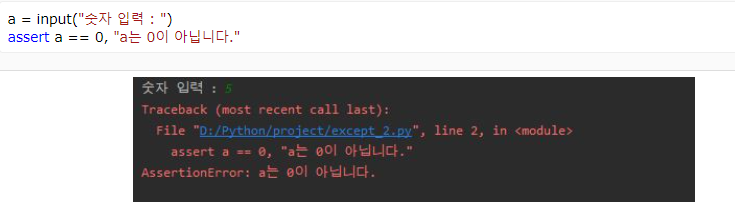